## State / MSA COVID-19 Reopening Indicators 

In [1]:
import pandas as pd

import utils
import default_parameters
import make_charts
import meet_indicators

from IPython.display import Markdown 
import IPython.display

# Default parameters
county_state_name = default_parameters.county_state_name
state_name = default_parameters.state_name
msa_name = default_parameters.msa_name
time_zone = default_parameters.time_zone

fulldate_format = default_parameters.fulldate_format
monthdate_format = default_parameters.monthdate_format
start_date = default_parameters.start_date
yesterday_date = default_parameters.yesterday_date
today_date = default_parameters.today_date
two_weeks_ago = default_parameters.two_weeks_ago
two_days_ago = default_parameters.two_days_ago

In [2]:
def summary_of_indicators():
    # Grab indicators
    state_case_indicator = meet_indicators.meet_case("state", state_name, start_date)
    state_death_indicator = meet_indicators.meet_death("state", state_name, start_date)
    msa_case_indicator = meet_indicators.meet_case("msa", msa_name, start_date)
    msa_death_indicator = meet_indicators.meet_death("msa", msa_name, start_date)
    
    # Check cases according to some criterion
    def check_cases(row):
        status = ["failed" if x < 14 else "met" if x >= 14 else "" for x in row]
        return pd.Series(status, index=row.index, dtype="category")

    # Check deaths according to some criterion
    def check_deaths(row):
        status = ["failed" if x < 14 else "met" if x >= 14 else "" for x in row]
        return pd.Series(status, index=row.index, dtype="category")

    # Map the failed/met/exceeded state to a CSS string for the table entry
    red = make_charts.maroon
    green = make_charts.green

    stylemap = {
        "failed": f"background-color: {red}; color: white; font-weight: bold; opacity: 0.6",
        "met": f"background-color: {green}; color: white; font-weight: bold; opacity: 0.6",
    }

    # Map a row name to a check function
    fnmap = {
        "Cases": check_cases,
        "Deaths": check_deaths,
    }
    
    indicator_names = ["Cases", "Deaths"]

    df = pd.DataFrame(
        {"state": [state_case_indicator, state_death_indicator], 
         "msa": [msa_case_indicator, msa_death_indicator]},
        index=indicator_names
    )
    
    # Style the table
    html = df.style.apply(lambda row: fnmap[row.name](row).map(stylemap), axis=1).render()
    
    # Display summary
    display(Markdown(f"### Summary of Indicators as of {yesterday_date}:"))
    display(Markdown("Cases and deaths report the number of days with declining values over the past 14 days."))
    display(Markdown("These should sustain a 14-day downward trajectory."))
    display(Markdown("Indicators can <bold><span style='color:#F3324C'>fail to meet the lower benchmark; </span><span style='color:#10DE7A'>meet the lower benchmark; </span><span style = 'color:#1696D2'>or exceed the higher benchmark.</span></bold>"))    
    display(IPython.display.HTML(html))
    

In [3]:
summary_of_indicators()

### Summary of Indicators as of 6/4/20:

Cases and deaths report the number of days with declining values over the past 14 days.

These should sustain a 14-day downward trajectory.

Indicators can <bold><span style='color:#F3324C'>fail to meet the lower benchmark; </span><span style='color:#10DE7A'>meet the lower benchmark; </span><span style = 'color:#1696D2'>or exceed the higher benchmark.</span></bold>

,state,msa
Cases,2,3
Deaths,8,8


## Caseload Charts

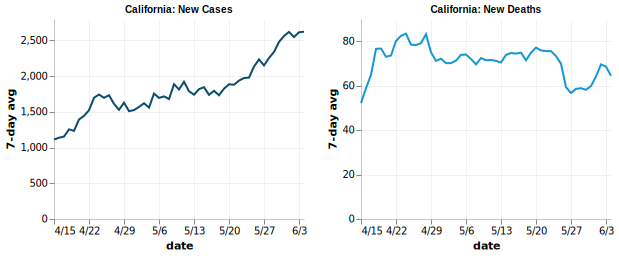

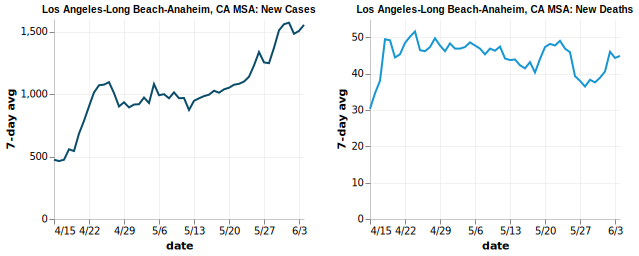

In [4]:
ca = utils.state_case_charts(state_name, start_date)
la_msa = utils.msa_case_charts(msa_name, start_date)